<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/SSIM-Structural-Similarity-Index-/blob/master/SSIM_CALCULATION_FOR_5_THRESHOLD_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

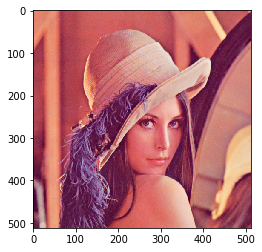

In [2]:
img = io.imread("lena.tiff")
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')  







In [0]:
#Let's clean the noise using edge preserving filter.
#As mentioned in previous tutorial, my favorite is NLM

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float







In [0]:
float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

#Let's look at the histogram to see howmany peaks we have. 
#Then pick the regions for our histogram segmentation.

#plt.hist(denoise_img_as_8byte.flat, bins=100, range=(0,100))  #.flat returns the flattened numpy array (1D)






In [0]:



segm1 = (denoise_img_as_8byte <= 64)
segm2 = (denoise_img_as_8byte > 64) & (denoise_img_as_8byte <= 97)
segm3 = (denoise_img_as_8byte > 97) & (denoise_img_as_8byte <= 137)
segm4 = (denoise_img_as_8byte > 137) & (denoise_img_as_8byte <= 179)
segm5 = (denoise_img_as_8byte > 179)








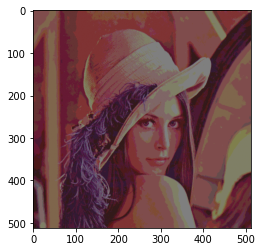

In [6]:
#How to show all these images in single visualization?
#Construct a new empty image with same shape as original except with 3 layers.
#print(median_img.shape[0])
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1],3)) #nothing but denoise img size but blank

all_segments[segm1] = 0.1
all_segments[segm2] = 0.2
all_segments[segm3] = 0.3
all_segments[segm4] = 0.4
all_segments[segm5] = 0.5

plt.imshow(all_segments,cmap='gray')



In [7]:
#Lot of yellow dots, red dots and stray dots. how to clean
#We can use binary opening and closing operations. Open takes care of isolated pixels within the window
#Closing takes care of isolated holes within the defined window



def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

mse(img,all_segments)



59476.350352516165

In [8]:
import cv2
all_segments = np.full((512,512,3), 12, np.uint8)
gray_image = cv2.cvtColor(all_segments, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

img=cv2.imread("lena.tiff",0)
print(img.shape)



(512, 512)
(512, 512)


In [0]:
from skimage.measure import compare_ssim as ssim



In [0]:
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = 59476.350352516165
    s = ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """


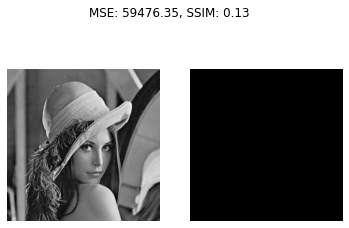

In [11]:

compare_images(img,gray_image,"img vs all_segments")